Sensitivity Test

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import scipy as sp
import seaborn as sn

In [ ]:
# the csv we read here is the dataset after we processed
# there is another sheet (named: formulation and logic.xlsx) in the submission folder include formula, price forecast and so on, which we manually input in the following part
# this csv is included in our submission with the name below, but you might need to change path when download the file
df = pd.read_csv('/content/Risk & Uncertainty.csv')

# Creating Dataframes of Electricity and Natural Gas Savings

In [ ]:
# create a new column in df representing the saving of electricity for each asset
electricity_decrease = [int(i.replace(',','')) for i in df['electricity decrease (kWh)']]
electricity_price_2022 = 0.1882569
# For here it's actually 29 years in total, as the energy forecast our mentor provide is from 2021-2050, but we should start at 2022
# thus we put 0 in the first item of the following list
electricity_price_30years = [0, 0.1882569, 0.1864817, 0.1907047, 0.2020004, 0.2114476, 0.2202157, 
                             0.2217536, 0.2327316, 0.2345783, 0.2458497, 0.2431093, 0.2631218, 0.2620243,
                             0.2722966,	0.2685057, 0.2750277,	0.2826148, 0.2904726, 0.2992698, 0.3069426,
                             0.3144881,	0.3378998, 0.3435153,	0.3509531, 0.35959,	0.3649221, 0.3738796, 
                             0.3829504, 0.3891904]
df['electricity saving 2022'] = [electricity_price_2022*i for i in electricity_decrease]

In [ ]:
# Create a new data frame with the electricity saving of each asset in 30-year-period
electricity_saving = pd.DataFrame()
year = 2021
for i in electricity_price_30years:
  electricity_saving[str(year)] = [i*k for k in electricity_decrease]
  year = year + 1

In [ ]:
# create a new column in df representing the saving of natural gas for each asset
natural_gas_decrease = [int(i.replace(',','')) for i in df['natural gas decrease (kWh)']]
natural_gas_price_2022 = 0.03189363357
natural_gas_price_30years = [0, 0.03189363357, 0.03141992494, 0.03100358581, 
                             0.0311877448, 0.03187213238, 0.03284187649, 0.03406824974,
                             0.03555588536, 0.03666025247, 0.03868389628, 0.03960443535,
                             0.04105704538, 0.04210088707, 0.04279242579, 0.04376073013,
                             0.04493561924, 0.04602163084, 0.04718406687, 0.04833510747, 
                             0.04951494371, 0.05061545548, 0.05179235756, 0.05283664278, 
                             0.05410464005, 0.05538522689, 0.05673517571, 0.05803647219, 
                             0.05955598772, 0.06097362675]
df['natural gas saving 2022'] = [natural_gas_price_2022*i for i in natural_gas_decrease]

In [ ]:
# Create a new data frame with the natural gas saving of each asset in 30-year-period
natural_gas_saving = pd.DataFrame()
year = 2021
for i in natural_gas_price_30years:
  natural_gas_saving[str(year)] = [i*k for k in natural_gas_decrease]
  year = year + 1

# Create Dataframes of Non-cumulative Total Savings

In [ ]:
# non-cumulative total saving
df_final_saving = pd.DataFrame()
df_final_saving = electricity_saving + natural_gas_saving

# Creating Dataframes of Cumulative Electricity and Natural Gas Savings

In [ ]:
# Create a new data frame with the electricity saving of each asset in 30-year-period
electricity_saving_cumulative = electricity_saving
electricity_saving_cumulative.iloc[:, 0:] = electricity_saving_cumulative.iloc[:, 0:].cumsum(axis = 1)

In [ ]:
electricity_saving_cumulative

,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,0.0,96379.626010,191850.424179,289483.220981,392898.941765,5.011512e+05,6.138924e+05,7.274210e+05,8.465698e+05,9.666640e+05,...,2.507266e+06,2.668271e+06,2.841261e+06,3.017126e+06,3.196800e+06,3.380895e+06,3.567719e+06,3.759130e+06,3.955185e+06,4.154434e+06
1,0.0,19292.567112,38403.211728,57946.629384,78647.630376,1.003168e+05,1.228845e+05,1.456098e+05,1.694601e+05,1.934997e+05,...,5.018861e+05,5.341148e+05,5.687428e+05,6.039463e+05,6.399119e+05,6.767627e+05,7.141599e+05,7.524751e+05,7.917199e+05,8.316041e+05
2,0.0,209429.212259,416883.576649,629035.880735,853754.255721,1.088982e+06,1.333965e+06,1.580658e+06,1.839563e+06,2.100524e+06,...,5.448192e+06,5.798049e+06,6.173951e+06,6.556100e+06,6.946523e+06,7.346554e+06,7.752517e+06,8.168445e+06,8.594464e+06,9.027425e+06
3,0.0,107278.759236,213545.915426,322219.560835,437330.094776,5.578241e+05,6.833147e+05,8.096817e+05,9.423045e+05,1.075980e+06,...,2.790801e+06,2.970013e+06,3.162566e+06,3.358320e+06,3.558311e+06,3.763225e+06,3.971177e+06,4.184233e+06,4.402459e+06,4.624240e+06
4,0.0,154516.557098,307576.074415,464101.724558,629898.602868,8.034495e+05,9.841970e+05,1.166207e+06,1.357227e+06,1.549763e+06,...,4.019668e+06,4.277792e+06,4.555132e+06,4.837080e+06,5.125134e+06,5.420276e+06,5.719795e+06,6.026666e+06,6.340982e+06,6.660420e+06
5,0.0,88094.816355,175358.927870,264599.192235,359125.279415,4.580722e+05,5.611221e+05,6.648917e+05,7.737985e+05,8.835694e+05,...,2.291741e+06,2.438906e+06,2.597026e+06,2.757774e+06,2.922002e+06,3.090272e+06,3.261038e+06,3.435995e+06,3.615196e+06,3.797318e+06
6,0.0,13764.968014,27400.136955,41344.083209,56113.948457,7.157457e+04,8.767631e+04,1.038905e+05,1.209074e+05,1.380593e+05,...,3.580885e+05,3.810832e+05,4.057898e+05,4.309069e+05,4.565679e+05,4.828604e+05,5.095428e+05,5.368801e+05,5.648807e+05,5.933375e+05
7,0.0,36176.010675,72010.893592,108657.280858,147474.283723,1.881067e+05,2.304240e+05,2.730368e+05,3.177592e+05,3.628365e+05,...,9.411001e+05,1.001533e+06,1.066465e+06,1.132476e+06,1.199916e+06,1.269016e+06,1.339140e+06,1.410986e+06,1.484575e+06,1.559363e+06
8,0.0,8767.688604,17452.700818,26334.390811,35742.155440,4.558990e+04,5.584601e+04,6.617374e+04,7.701275e+04,8.793776e+04,...,2.280869e+05,2.427335e+05,2.584705e+05,2.744691e+05,2.908140e+05,3.075612e+05,3.245567e+05,3.419694e+05,3.598045e+05,3.779303e+05
9,0.0,49416.118452,98366.259330,148424.908147,201448.599144,2.569521e+05,3.147572e+05,3.729660e+05,4.340564e+05,4.956315e+05,...,1.285535e+06,1.368086e+06,1.456782e+06,1.546952e+06,1.639075e+06,1.733465e+06,1.829254e+06,1.927395e+06,2.027917e+06,2.130077e+06


In [ ]:
# Total saving of electricity in 30-year-period
total_electricity_saving = electricity_saving.sum().sum()

In [ ]:
# Create a new data frame with the natural gas saving of each asset in 30-year-period
natural_gas_saving_cumulative = natural_gas_saving
natural_gas_saving_cumulative.iloc[:, 0:] = natural_gas_saving_cumulative.iloc[:, 0:].cumsum(axis = 1)

# Create Dataframes of Cumulative Total Savings

In [ ]:
# Create a new data frame with the final saving of each asset in 30-year-period
df_final_saving_cumulative = electricity_saving_cumulative + natural_gas_saving_cumulative
df_final_saving_cumulative

,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,0.0,96388.301079,191867.645467,289508.875245,392933.079094,5.011940e+05,6.139442e+05,7.274820e+05,8.466404e+05,9.667446e+05,...,2.507478e+06,2.668497e+06,2.841501e+06,3.017381e+06,3.197069e+06,3.381179e+06,3.568019e+06,3.759446e+06,3.955516e+06,4.154782e+06
1,0.0,19513.526205,38841.848061,58600.058560,79517.128248,1.014071e+05,1.242023e+05,1.471637e+05,1.712603e+05,1.955539e+05,...,5.072934e+05,5.398728e+05,5.748596e+05,6.104291e+05,6.467696e+05,6.840041e+05,7.217943e+05,7.605116e+05,8.001690e+05,8.404756e+05
2,0.0,243177.524408,483878.945213,728837.755631,986557.505153,1.255511e+06,1.535245e+06,1.817988e+06,2.114517e+06,2.414269e+06,...,6.274073e+06,6.677489e+06,7.108195e+06,7.546253e+06,7.993927e+06,8.452564e+06,8.918562e+06,9.395901e+06,9.884939e+06,1.038242e+07
3,0.0,114910.331664,228695.710333,344787.955762,467361.155655,5.954816e+05,7.288307e+05,8.633496e+05,1.004480e+06,1.146928e+06,...,2.977559e+06,3.168883e+06,3.373829e+06,3.582225e+06,3.795163e+06,4.013329e+06,4.234857e+06,4.461800e+06,4.694276e+06,4.930648e+06
4,0.0,185002.820299,368095.795529,554256.936250,749865.337745,9.538820e+05,1.166022e+06,1.380597e+06,1.605604e+06,1.833183e+06,...,4.765721e+06,5.072227e+06,5.399074e+06,5.731528e+06,6.071298e+06,6.419382e+06,6.773133e+06,7.135479e+06,7.506723e+06,7.884444e+06
5,0.0,88236.105152,175639.406934,265017.017184,359681.266074,4.587694e+05,5.619648e+05,6.658853e+05,7.749496e+05,8.848829e+05,...,2.295198e+06,2.442587e+06,2.600937e+06,2.761919e+06,2.926387e+06,3.094903e+06,3.265919e+06,3.441133e+06,3.620599e+06,3.802991e+06
6,0.0,15719.601241,31280.371702,47124.403716,63805.641091,8.121958e+04,9.933406e+04,1.176361e+05,1.368321e+05,1.562308e+05,...,4.059218e+05,4.320186e+05,4.598993e+05,4.882546e+05,5.172315e+05,5.469183e+05,5.770777e+05,6.079719e+05,6.396224e+05,6.718161e+05
7,0.0,40230.010438,80058.680014,120645.933072,163427.210179,2.081109e+05,2.546027e+05,3.015460e+05,3.507879e+05,4.005250e+05,...,1.040309e+06,1.107175e+06,1.178691e+06,1.251418e+06,1.325735e+06,1.401875e+06,1.479211e+06,1.558434e+06,1.639593e+06,1.722131e+06
8,0.0,14160.519317,28158.263799,42282.288110,56963.526132,7.220047e+04,8.800974e+04,1.040980e+05,1.209491e+05,1.380729e+05,...,3.600590e+05,3.832642e+05,4.077586e+05,4.326912e+05,4.581846e+05,4.842968e+05,5.108855e+05,5.381115e+05,5.660168e+05,5.944525e+05
9,0.0,64031.057099,127379.064381,191644.796360,258959.959534,3.290686e+05,4.019231e+05,4.757433e+05,5.531268e+05,6.315012e+05,...,1.643188e+06,1.748933e+06,1.861363e+06,1.975745e+06,2.092661e+06,2.212430e+06,2.334218e+06,2.458954e+06,2.586766e+06,2.716867e+06


In [ ]:
# Total saving of natural gas in 30-year-period
total_natural_gas_saving = natural_gas_saving.sum().sum()

In [ ]:
# total energy saving of all assets in 30-year-period
total_energy_saving = total_electricity_saving + total_natural_gas_saving
total_energy_saving

1064749248.4762461

# Creating Dataframes of Electricity and Natural Gas Cost

In [ ]:
# create a new column representing the new cost of electricity
electricity_consumption_raw = [int(i.replace(',','')) for i in df['new electricity consumption (kWh)']]
df['electricity cost 2022'] = [electricity_price_2022*i for i in electricity_consumption_raw]
# create a new column representing the new cost of natural gas 
natural_gas_consumption_raw = [int(i.replace(',','')) for i in df['new natural gas consumption (kWh)']]
df['natural gas cost 2022'] = [natural_gas_price_2022*i for i in natural_gas_consumption_raw]

In [ ]:
# Create a new data frame with the electricity cost of each asset in 30-year-period
electricity_cost = pd.DataFrame()
year = 2021
for i in electricity_price_30years:
  electricity_cost[str(year)] = [i*k for k in electricity_consumption_raw]
  year = year + 1

In [ ]:
total_electricity_cost = electricity_cost.sum().sum()

In [ ]:
# Create a new data frame with the natural gas cost of each asset in 30-year-period
natural_gas_cost = pd.DataFrame()
year = 2021
for i in natural_gas_price_30years:
  natural_gas_cost[str(year)] = [i*k for k in natural_gas_consumption_raw]
  year = year + 1

In [ ]:
# Total cost of natural gas in 30-year-period
total_natural_gas_cost = natural_gas_cost.sum().sum()

# Create Dataframes of Non-cumulative Total Cost

In [ ]:
df_final_cost = pd.DataFrame()
df_final_cost = electricity_cost + natural_gas_cost

# Creating Dataframes of Cumulative Electricity and Natural Gas Cost

In [ ]:
# Create a new data frame with the electricity cost of each asset in 30-year-period
electricity_cost_cumulative = electricity_cost
electricity_cost_cumulative.iloc[:, 0:] = electricity_cost_cumulative.iloc[:, 0:].cumsum(axis = 1)
electricity_cost_cumulative

,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,0.0,74755.685449,148806.449628,224534.141770,304747.288608,388711.861882,4.761582e+05,5.642152e+05,6.566315e+05,7.497812e+05,...,1.944730e+06,2.069612e+06,2.203790e+06,2.340197e+06,2.479559e+06,2.622350e+06,2.767258e+06,2.915724e+06,3.067791e+06,3.222336e+06
1,0.0,115300.385745,229513.527172,346313.099848,470030.870833,599534.702272,7.344087e+05,8.702245e+05,1.012764e+06,1.156435e+06,...,2.999480e+06,3.192092e+06,3.399043e+06,3.609433e+06,3.824379e+06,4.044615e+06,4.268116e+06,4.497104e+06,4.731646e+06,4.970011e+06
2,0.0,63087.334530,125579.776462,189487.400593,257180.360638,328039.200217,4.018363e+05,4.761489e+05,5.541402e+05,6.327505e+05,...,1.641184e+06,1.746573e+06,1.859808e+06,1.974924e+06,2.092533e+06,2.213037e+06,2.335327e+06,2.460619e+06,2.588950e+06,2.719373e+06
3,0.0,15281.189087,30418.281639,45898.163548,62294.940016,79458.564604,9.733391e+04,1.153341e+05,1.342254e+05,1.532666e+05,...,3.975322e+05,4.230598e+05,4.504878e+05,4.783716e+05,5.068592e+05,5.360479e+05,5.656693e+05,5.960179e+05,6.271027e+05,6.586941e+05
4,0.0,35051.363954,69772.205195,105279.322584,142889.575059,182258.792256,2.232605e+05,2.645486e+05,3.078807e+05,3.515566e+05,...,9.118430e+05,9.703972e+05,1.033310e+06,1.097269e+06,1.162613e+06,1.229565e+06,1.297509e+06,1.367121e+06,1.438422e+06,1.510885e+06
5,0.0,112005.701738,222955.226933,336417.276655,456599.838639,582403.125631,7.134231e+05,8.453581e+05,9.838245e+05,1.123390e+06,...,2.913770e+06,3.100879e+06,3.301916e+06,3.506295e+06,3.715098e+06,3.929041e+06,4.146156e+06,4.368600e+06,4.596441e+06,4.827994e+06
6,0.0,48631.840206,96805.098322,146069.271359,198251.428690,252874.052855,3.097617e+05,3.670467e+05,4.271675e+05,4.877654e+05,...,1.265132e+06,1.346373e+06,1.433661e+06,1.522401e+06,1.613061e+06,1.705953e+06,1.800222e+06,1.896806e+06,1.995732e+06,2.096270e+06
7,0.0,60275.905985,119983.430209,181043.070351,245719.356422,313420.437543,3.839289e+05,4.549297e+05,5.294455e+05,6.045525e+05,...,1.568046e+06,1.668739e+06,1.776927e+06,1.886914e+06,1.999281e+06,2.114415e+06,2.231255e+06,2.350963e+06,2.473576e+06,2.598187e+06
8,0.0,6610.641043,13158.945939,19855.541480,26948.785526,34373.768000,4.210664e+04,4.989352e+04,5.806589e+04,6.630311e+04,...,1.719724e+05,1.830156e+05,1.948810e+05,2.069435e+05,2.192672e+05,2.318943e+05,2.447085e+05,2.578373e+05,2.712846e+05,2.849510e+05
9,0.0,23454.927171,46688.682174,70448.580747,95615.810583,121960.067067,1.493967e+05,1.770250e+05,2.060211e+05,2.352472e+05,...,6.101677e+05,6.493498e+05,6.914487e+05,7.342473e+05,7.779726e+05,8.227739e+05,8.682395e+05,9.148212e+05,9.625330e+05,1.011022e+06


In [ ]:
# Create a new data frame with the natural gas cost of each asset in 30-year-period
natural_gas_cost_cumulative = natural_gas_cost
natural_gas_cost_cumulative.iloc[:, 0:] = natural_gas_cost_cumulative.iloc[:, 0:].cumsum(axis = 1)
natural_gas_cost_cumulative

,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,0.0,6.729557,13.359161,19.900917,26.481532,33.206552,40.136187,47.324588,54.826880,62.562193,...,164.684250,175.364111,186.292298,197.440830,208.856909,220.543192,232.514314,244.760009,257.326323,270.191758
1,0.0,1320.460217,2621.307949,3904.918409,5196.153419,6515.723444,7875.442815,9285.936490,10758.021256,12275.829029,...,32314.015639,34409.596727,36553.903914,38741.446599,40981.486906,43274.546070,45623.495815,48026.321836,50492.058840,53016.488934
2,0.0,10166.159488,20181.323402,30063.778386,40004.934417,50164.240357,60632.654172,71491.976913,82825.486484,94511.015279,...,248784.046977,264917.824642,281426.742199,298268.527758,315514.489984,333168.641825,351253.092553,369752.334137,388735.924334,408171.389808
3,0.0,1087.062607,2157.979328,3214.705547,4277.708641,5364.038401,6483.420919,7644.603143,8856.489940,10106.017985,...,26602.360008,28327.537192,30092.827907,31893.712040,33737.814591,35625.564665,37559.326394,39537.441512,41567.347797,43645.572891
4,0.0,6915.656035,13728.595460,20451.257989,27213.852632,34124.846457,41246.114746,48633.303678,56343.064080,64292.289924,...,169238.432469,180213.634758,191444.030609,202900.864046,214632.643672,226642.099344,238944.271169,251528.609617,264442.432214,277663.648570
5,0.0,179.656838,356.645275,531.288474,706.969040,886.504762,1071.503052,1263.409503,1463.695805,1670.203008,...,4396.523117,4681.639978,4973.386328,5271.015137,5575.786574,5887.771557,6207.360802,6534.280250,6869.759129,7213.223568
6,0.0,6905.705221,13708.841629,20421.831040,27174.695107,34075.744826,41186.766449,48563.326088,56261.993054,64199.780899,...,168994.918318,179954.328584,191168.565220,202608.913625,214323.812603,226315.988085,238600.458535,251166.689603,264061.930732,277264.123317
7,0.0,6754.720760,13409.115243,19975.333678,26580.554962,33330.722006,40286.270186,47501.550731,55031.896135,62796.134345,...,165300.059373,176019.856073,186988.907689,198179.127426,209637.895038,221367.876856,233383.762984,245675.249393,258288.552476,271202.095912
8,0.0,4066.023663,8071.655634,12024.209778,16000.241799,20063.524340,24250.436648,28593.695603,33126.608760,37800.314366,...,99502.847973,105955.660545,112558.512834,119294.497912,126192.136158,133253.032578,140486.029924,147884.925654,155477.539861,163250.884614
9,0.0,6936.865301,13770.698976,20513.978890,27297.313384,34229.502176,41372.610313,48782.454631,56515.859697,64489.464609,...,169757.461028,180766.322594,192031.160364,203523.130168,215290.889379,227337.176228,239677.076945,252300.009646,265253.436975,278515.200793


# Create Dataframes of cumulative total cost

In [ ]:
# Create a new data frame with the final cost of each asset in 30-year-period
df_final_cost_cumulative = electricity_cost_cumulative + natural_gas_cost_cumulative
df_final_cost_cumulative

,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,0.0,74762.415005,148819.808789,224554.042688,304773.770139,388745.068434,4.761983e+05,5.642625e+05,6.566864e+05,7.498437e+05,...,1.944895e+06,2.069787e+06,2.203976e+06,2.340395e+06,2.479768e+06,2.622570e+06,2.767491e+06,2.915968e+06,3.068048e+06,3.222606e+06
1,0.0,116620.845962,232134.835121,350218.018257,475227.024252,606050.425716,7.422841e+05,8.795105e+05,1.023522e+06,1.168710e+06,...,3.031794e+06,3.226502e+06,3.435597e+06,3.648175e+06,3.865361e+06,4.087889e+06,4.313740e+06,4.545130e+06,4.782139e+06,5.023028e+06
2,0.0,73253.494017,145761.099864,219551.178979,297185.295055,378203.440574,4.624690e+05,5.476408e+05,6.369657e+05,7.272615e+05,...,1.889968e+06,2.011491e+06,2.141235e+06,2.273193e+06,2.408048e+06,2.546205e+06,2.686580e+06,2.830371e+06,2.977686e+06,3.127544e+06
3,0.0,16368.251693,32576.260967,49112.869095,66572.648657,84822.603004,1.038173e+05,1.229787e+05,1.430819e+05,1.633726e+05,...,4.241346e+05,4.513874e+05,4.805806e+05,5.102654e+05,5.405970e+05,5.716734e+05,6.032286e+05,6.355553e+05,6.686701e+05,7.023396e+05
4,0.0,41967.019989,83500.800655,125730.580572,170103.427692,216383.638713,2.645066e+05,3.131819e+05,3.642237e+05,4.158489e+05,...,1.081081e+06,1.150611e+06,1.224754e+06,1.300170e+06,1.377245e+06,1.456207e+06,1.536453e+06,1.618650e+06,1.702865e+06,1.788549e+06
5,0.0,112185.358576,223311.872208,336948.565129,457306.807680,583289.630393,7.144946e+05,8.466215e+05,9.852882e+05,1.125060e+06,...,2.918167e+06,3.105560e+06,3.306890e+06,3.511566e+06,3.720674e+06,3.934929e+06,4.152363e+06,4.375134e+06,4.603310e+06,4.835207e+06
6,0.0,55537.545428,110513.939951,166491.102399,225426.123797,286949.797681,3.509485e+05,4.156100e+05,4.834295e+05,5.519652e+05,...,1.434127e+06,1.526327e+06,1.624830e+06,1.725010e+06,1.827385e+06,1.932269e+06,2.038823e+06,2.147972e+06,2.259794e+06,2.373535e+06
7,0.0,67030.626745,133392.545453,201018.404029,272299.911384,346751.159549,4.242152e+05,5.024313e+05,5.844774e+05,6.673487e+05,...,1.733346e+06,1.844759e+06,1.963916e+06,2.085093e+06,2.208919e+06,2.335783e+06,2.464639e+06,2.596639e+06,2.731865e+06,2.869389e+06
8,0.0,10676.664706,21230.601573,31879.751257,42949.027325,54437.292339,6.635708e+04,7.848722e+04,9.119250e+04,1.041034e+05,...,2.714752e+05,2.889713e+05,3.074395e+05,3.262380e+05,3.454594e+05,3.651473e+05,3.851945e+05,4.057222e+05,4.267621e+05,4.482019e+05
9,0.0,30391.792472,60459.381150,90962.559637,122913.123967,156189.569243,1.907694e+05,2.258075e+05,2.625369e+05,2.997366e+05,...,7.799252e+05,8.301161e+05,8.834799e+05,9.377704e+05,9.932635e+05,1.050111e+06,1.107917e+06,1.167121e+06,1.227786e+06,1.289537e+06


# Computing Investment Cost & Other Expenses

In [ ]:
# remove all "," and "$" in the cost column
investment = [i.replace(',','') for i in df['cost']]
investment_raw = [int(i.replace('$','')) for i in investment]
df['investment'] = investment_raw
investment_list = df['investment']

In [ ]:
# create a new dataframe with the investment of each asset in 30-year-period, in which the number of each year is the same for the same asset
# this dataframe is for the use for computing a pay-back period dataframe later
year = 2021
df_investment = pd.DataFrame(investment_raw, columns = [str(year)])

for i in range(1,30):
  year = year + 1
  investment_list = [k for k in investment_raw]
  df_investment[str(year)] = investment_list

df_investment

,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,319494,319494,319494,319494,319494,319494,319494,319494,319494,319494,...,319494,319494,319494,319494,319494,319494,319494,319494,319494,319494
1,525809,525809,525809,525809,525809,525809,525809,525809,525809,525809,...,525809,525809,525809,525809,525809,525809,525809,525809,525809,525809
2,525809,525809,525809,525809,525809,525809,525809,525809,525809,525809,...,525809,525809,525809,525809,525809,525809,525809,525809,525809,525809
3,92684,92684,92684,92684,92684,92684,92684,92684,92684,92684,...,92684,92684,92684,92684,92684,92684,92684,92684,92684,92684
4,324094,324094,324094,324094,324094,324094,324094,324094,324094,324094,...,324094,324094,324094,324094,324094,324094,324094,324094,324094,324094
5,220228,220228,220228,220228,220228,220228,220228,220228,220228,220228,...,220228,220228,220228,220228,220228,220228,220228,220228,220228,220228
6,174119,174119,174119,174119,174119,174119,174119,174119,174119,174119,...,174119,174119,174119,174119,174119,174119,174119,174119,174119,174119
7,195063,195063,195063,195063,195063,195063,195063,195063,195063,195063,...,195063,195063,195063,195063,195063,195063,195063,195063,195063,195063
8,59623,59623,59623,59623,59623,59623,59623,59623,59623,59623,...,59623,59623,59623,59623,59623,59623,59623,59623,59623,59623
9,230553,230553,230553,230553,230553,230553,230553,230553,230553,230553,...,230553,230553,230553,230553,230553,230553,230553,230553,230553,230553


In [ ]:
# we do not compute the rent for now
# but our mentor asks us to keep the code for future use of other expenses
year = 2021
df_rent = pd.DataFrame(investment_raw, columns = [str(year)])

for i in range(1,30):
  year = year + 1
  rent_list = [k*(1+0.0287)**i for k in investment_raw] # add inflation rate
  df_rent[str(year)] = rent_list

df_rent

,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,319494,328663.4778,338096.119613,347799.478246,357781.323271,368049.647249,378612.672125,389478.855815,400656.898977,412155.751978,...,562648.937830,578796.962346,595408.435165,6.124967e+05,6.300753e+05,6.481585e+05,6.667606e+05,6.858967e+05,7.055819e+05,7.258321e+05
1,525809,540899.7183,556423.540215,572392.895819,588820.571929,605719.722344,623103.878375,640986.959684,659383.285427,678307.585719,...,925982.570413,952558.270184,979896.692538,1.008020e+06,1.036950e+06,1.066710e+06,1.097325e+06,1.128818e+06,1.161215e+06,1.194542e+06
2,525809,540899.7183,556423.540215,572392.895819,588820.571929,605719.722344,623103.878375,640986.959684,659383.285427,678307.585719,...,925982.570413,952558.270184,979896.692538,1.008020e+06,1.036950e+06,1.066710e+06,1.097325e+06,1.128818e+06,1.161215e+06,1.194542e+06
3,92684,95344.0308,98080.404484,100895.312093,103791.007550,106769.809466,109834.102998,112986.341754,116229.049762,119564.823491,...,163222.327035,167906.807821,172725.733206,1.776830e+05,1.827825e+05,1.880283e+05,1.934247e+05,1.989760e+05,2.046866e+05,2.105611e+05
4,324094,333395.4978,342963.948587,352807.013911,362932.575211,373348.740119,384063.848961,395086.481426,406425.463443,418089.874243,...,570749.825841,587130.345842,603980.986768,6.213152e+05,6.391470e+05,6.574905e+05,6.763605e+05,6.957720e+05,7.157407e+05,7.362824e+05
5,220228,226548.5436,233050.486801,239739.035773,246619.546099,253697.527072,260978.646099,268468.733242,276173.785886,284099.973541,...,387835.296689,398966.169704,410416.498775,4.221955e+05,4.343125e+05,4.467772e+05,4.595997e+05,4.727902e+05,4.863593e+05,5.003178e+05
6,174119,179116.2153,184256.850679,189545.022294,194984.964433,200581.032913,206337.708557,212259.600793,218351.451336,224618.137989,...,306634.460760,315434.869784,324487.850547,3.338007e+05,3.433807e+05,3.532358e+05,3.633736e+05,3.738024e+05,3.845306e+05,3.955666e+05
7,195063,200661.3081,206420.287642,212344.549898,218438.838480,224708.033144,231157.153695,237791.364007,244615.976154,251636.454669,...,343518.156084,353377.127164,363519.050713,3.739520e+05,3.846845e+05,3.957249e+05,4.070822e+05,4.187655e+05,4.307840e+05,4.431476e+05
8,59623,61334.1801,63094.471069,64905.282389,66768.063993,68684.307430,70655.547053,72683.361253,74769.373721,76915.254747,...,104999.836054,108013.331349,111113.313958,1.143023e+05,1.175827e+05,1.209574e+05,1.244288e+05,1.279999e+05,1.316735e+05,1.354526e+05
9,230553,237169.8711,243976.646401,250978.776152,258181.867028,265591.686612,273214.168017,281055.414639,289121.705040,297419.497974,...,406018.268148,417670.992443,429658.149926,4.419893e+05,4.546744e+05,4.677236e+05,4.811473e+05,4.949562e+05,5.091614e+05,5.237744e+05


In [ ]:
# we do not compute the rent for now
# but keep the code for future use of other expenses
# Create a new data frame with the rent of each asset in 30-year-period
df_rent_cumulative = df_rent
df_rent_cumulative.iloc[:, 0:] = df_rent_cumulative.iloc[:, 0:].cumsum(axis = 1)
df_rent_cumulative

,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,319494.0,6.481575e+05,9.862536e+05,1.334053e+06,1.691834e+06,2.059884e+06,2.438497e+06,2.827976e+06,3.228632e+06,3.640788e+06,...,9.034946e+06,9.613743e+06,1.020915e+07,1.082165e+07,1.145172e+07,1.209988e+07,1.276664e+07,1.345254e+07,1.415812e+07,1.488395e+07
1,525809.0,1.066709e+06,1.623132e+06,2.195525e+06,2.784346e+06,3.390065e+06,4.013169e+06,4.654156e+06,5.313540e+06,5.991847e+06,...,1.486931e+07,1.582187e+07,1.680177e+07,1.780979e+07,1.884674e+07,1.991345e+07,2.101077e+07,2.213959e+07,2.330081e+07,2.449535e+07
2,525809.0,1.066709e+06,1.623132e+06,2.195525e+06,2.784346e+06,3.390065e+06,4.013169e+06,4.654156e+06,5.313540e+06,5.991847e+06,...,1.486931e+07,1.582187e+07,1.680177e+07,1.780979e+07,1.884674e+07,1.991345e+07,2.101077e+07,2.213959e+07,2.330081e+07,2.449535e+07
3,92684.0,1.880280e+05,2.861084e+05,3.870037e+05,4.907948e+05,5.975646e+05,7.073987e+05,8.203850e+05,9.366141e+05,1.056179e+06,...,2.621004e+06,2.788911e+06,2.961636e+06,3.139319e+06,3.322102e+06,3.510130e+06,3.703555e+06,3.902531e+06,4.107217e+06,4.317779e+06
4,324094.0,6.574895e+05,1.000453e+06,1.353260e+06,1.716193e+06,2.089542e+06,2.473606e+06,2.868692e+06,3.275118e+06,3.693207e+06,...,9.165029e+06,9.752160e+06,1.035614e+07,1.097746e+07,1.161660e+07,1.227409e+07,1.295045e+07,1.364623e+07,1.436197e+07,1.509825e+07
5,220228.0,4.467765e+05,6.798270e+05,9.195661e+05,1.166186e+06,1.419883e+06,1.680862e+06,1.949331e+06,2.225504e+06,2.509604e+06,...,6.227811e+06,6.626777e+06,7.037193e+06,7.459389e+06,7.893701e+06,8.340479e+06,8.800078e+06,9.272869e+06,9.759228e+06,1.025955e+07
6,174119.0,3.532352e+05,5.374921e+05,7.270371e+05,9.220221e+05,1.122603e+06,1.328941e+06,1.541200e+06,1.759552e+06,1.984170e+06,...,4.923898e+06,5.239333e+06,5.563821e+06,5.897621e+06,6.241002e+06,6.594238e+06,6.957611e+06,7.331414e+06,7.715944e+06,8.111511e+06
7,195063.0,3.957243e+05,6.021446e+05,8.144891e+05,1.032928e+06,1.257636e+06,1.488793e+06,1.726585e+06,1.971201e+06,2.222837e+06,...,5.516172e+06,5.869549e+06,6.233068e+06,6.607020e+06,6.991704e+06,7.387429e+06,7.794512e+06,8.213277e+06,8.644061e+06,9.087209e+06
8,59623.0,1.209572e+05,1.840517e+05,2.489569e+05,3.157250e+05,3.844093e+05,4.550649e+05,5.277482e+05,6.025176e+05,6.794328e+05,...,1.686074e+06,1.794088e+06,1.905201e+06,2.019503e+06,2.137086e+06,2.258043e+06,2.382472e+06,2.510472e+06,2.642146e+06,2.777598e+06
9,230553.0,4.677229e+05,7.116995e+05,9.626783e+05,1.220860e+06,1.486452e+06,1.759666e+06,2.040721e+06,2.329843e+06,2.627263e+06,...,6.519791e+06,6.937462e+06,7.367120e+06,7.809109e+06,8.263784e+06,8.731507e+06,9.212654e+06,9.707611e+06,1.021677e+07,1.074055e+07


In [ ]:
# total investment of all assets
investment = sum(investment_raw)
investment

3455425

# Calculate Outputs

In [ ]:
electricity_cost_cumulative_corr = electricity_cost_cumulative.drop(columns = ['2021'])
natural_gas_cost_cumulative_corr = natural_gas_cost_cumulative.drop(columns = ['2021'])
df_final_cost_cumulative_corr = df_final_cost_cumulative.drop(columns = ['2021'])
electricity_saving_cumulative_corr = electricity_saving_cumulative.drop(columns = ['2021'])
natural_gas_saving_cumulative_corr = natural_gas_saving_cumulative.drop(columns = ['2021'])
df_final_saving_cumulative_corr = df_final_saving_cumulative.drop(columns = ['2021'])
df_investment_corr = df_investment.drop(columns = ['2021'])

In [ ]:
#simple payback period
df_simple = investment / df_final_saving_cumulative_corr
#discounted payback period
discounted_rate = 0.03
df_dissimple = investment / (df_final_saving_cumulative_corr*(1+discounted_rate))
#Net Savings
df_ns = df_final_saving_cumulative_corr - df_final_cost_cumulative_corr
#Savings-to-Investment Ratio
df_ratio = df_final_saving_cumulative_corr.div(df_final_cost_cumulative_corr.values)



# Correlation Check

## Data Conversion


In [ ]:
#The correlation check is very important for subsequent model building because only by finding the most correlated input variables with a certain output can we build function and sensitivity Hexbin plots. 
#In doing the correlation check, we first performed the necessary data cleaning and unit conversion, and built the regression model, test the p-value and found the Pearson correlation. 
#Pearson’s method measures the linear correlation coefficient between input X and output Y. 
#According to heatmaps visualization which shows presence of strong linear correlation, we also plotted scatter plots to visualize the correlation between variables more intuitionistic and understandable.
list(df.columns)
df.rename(columns={'Electricity reduction (kBtu/sqft)': 'Electricity_reduction', 
                   'Natural gas reduction (kBtu/sqft)': "Natural_gas_reduction",
                   }, inplace=True)
df.head()

,Asset Name,gross_floor_area (sqft),building type,electricity consumption (kWh),natural gas consumption (kWh),has natural gas?,EUI (kBtu/sqft),Is EUI smaller than Energy Star score,EUI reduction (kBtu/sqft),% electricity,...,new natural gas consumption (kWh),electricity decrease (kWh),natural gas decrease (kWh),building type for cost,cost,electricity saving 2022,natural gas saving 2022,electricity cost 2022,natural gas cost 2022,investment
0,South Cargo Building A,"125,524",Distribution Center,"909,052",483,True,24.72,False,13.92,99.95%,...,211,"511,958",272,Distribution Center,"$319,494",96379.626010,8.675068,74755.685449,6.729557,319494
1,North Cargo Building A,"206,582",Distribution Center,"714,943","48,330",True,12.61,False,1.81,93.67%,...,"41,402","102,480","6,928",Distribution Center,"$525,809",19292.567112,220.959093,115300.385745,1320.460217,525809
2,North Cargo Building B,"206,582",Distribution Center,"1,447,578","1,376,905",True,46.65,False,35.85,51.25%,...,"318,752","1,112,465","1,058,152",Distribution Center,"$525,809",209429.212259,33748.312149,63087.334530,10166.159488,525809
3,Boiler-room & Process Facility,"36,414",Distribution Center,"651,025","273,366",True,86.62,False,75.82,70.43%,...,"34,084","569,853","239,282",Distribution Center,"$92,684",107278.759236,7631.572428,15281.189087,1087.062607,92684
4,South Cargo Building B,"127,331",Distribution Center,"1,006,964","1,172,708",True,58.41,False,47.61,46.20%,...,"216,835","820,775","955,873",Distribution Center,"$324,094",154516.557098,30486.263201,35051.363954,6915.656035,324094


In [ ]:
#unit conversion
unit = 0.29301453352086
df['Electricity_reduction'] = df['Electricity_reduction'] * unit
df['Natural_gas_reduction'] = df['Natural_gas_reduction'] * unit
df_Electricity_reduction = df['Electricity_reduction']
df_Natural_gas_reduction = df['Natural_gas_reduction']

## Correlation check as a whole

In [ ]:
import seaborn as sns

In [ ]:
#using year 2022 as reference to find the correlations
df_whole = pd.DataFrame().assign(Cost_of_Electricity=electricity_cost_cumulative['2022'], Cost_of_Natural_Gas = natural_gas_cost_cumulative['2022'],
                                 Investment = df_investment['2022'], Electricity_reduction = df_Electricity_reduction,
                                 Natural_gas_reduction = df_Natural_gas_reduction, savings_to_investment_ratio =df_ratio['2022'],
                                 net_saving = df_ns['2022'], simple_payback = df_simple['2022'], dissimple_payback=df_dissimple['2022'])

In [ ]:
#visualized all correlation using a correlation plot
#creates the plot without the regression line
# sns.pairplot(df_whole, kind="scatter")
# plt.show()

In [ ]:
corr_matrix_whole = df_whole.corr()
round(corr_matrix_whole,3)
#The output below shows presence of strong linear correlation between:

#dissimple_payback and Investment and between dissimple_payback and Cost_of_Electricity;

,Cost_of_Electricity,Cost_of_Natural_Gas,Investment,Electricity_reduction,Natural_gas_reduction,savings_to_investment_ratio,net_saving,simple_payback,dissimple_payback
Cost_of_Electricity,1.000,-0.105,0.454,-0.397,-0.410,-0.544,-0.543,-0.054,-0.054
Cost_of_Natural_Gas,-0.105,1.000,0.553,-0.416,0.402,-0.136,0.237,-0.048,-0.048
Investment,0.454,0.553,1.000,-0.493,-0.045,-0.234,-0.015,-0.164,-0.164
Electricity_reduction,-0.397,-0.416,-0.493,1.000,-0.163,0.588,0.390,-0.345,-0.345
Natural_gas_reduction,-0.410,0.402,-0.045,-0.163,1.000,-0.019,0.181,0.046,0.046
savings_to_investment_ratio,-0.544,-0.136,-0.234,0.588,-0.019,1.000,0.693,-0.478,-0.478
net_saving,-0.543,0.237,-0.015,0.390,0.181,0.693,1.000,-0.600,-0.600
simple_payback,-0.054,-0.048,-0.164,-0.345,0.046,-0.478,-0.600,1.000,1.000
dissimple_payback,-0.054,-0.048,-0.164,-0.345,0.046,-0.478,-0.600,1.000,1.000


<ipython-input-37-f8ed4351d1b0>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr_matrix_whole.corr(), dtype=np.bool))


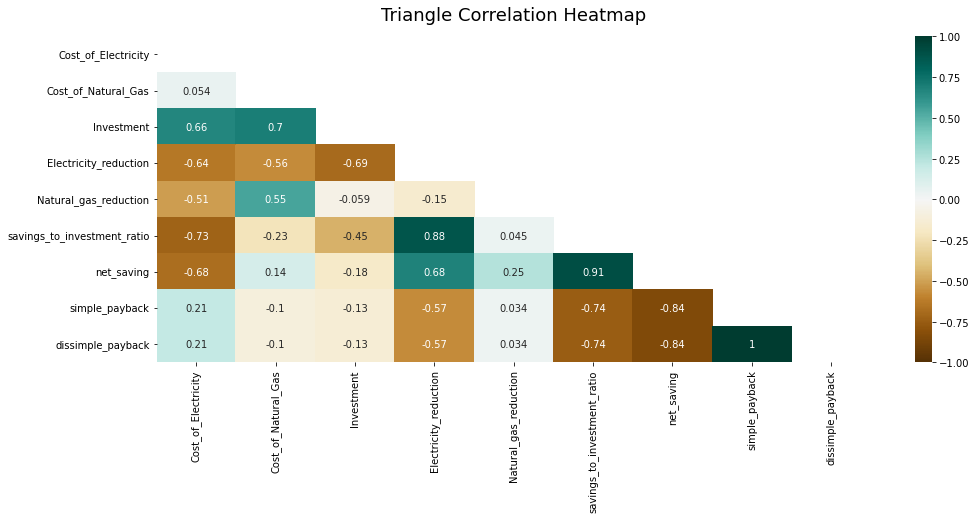

In [ ]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(corr_matrix_whole.corr(), dtype=np.bool))
heatmap = sns.heatmap(corr_matrix_whole.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

## Savings to Investment Ratio

In [ ]:
#plot features correlation with savings to investment ratio
df_stir = pd.DataFrame().assign(Cost_of_Electricity=electricity_cost_cumulative['2022'], Cost_of_Natural_Gas = natural_gas_cost_cumulative['2022'],
                                 Investment = df_investment['2022'], Electricity_reduction = df_Electricity_reduction,
                                 Natural_gas_reduction = df_Natural_gas_reduction, savings_to_investment_ratio =df_ratio['2022'])

Text(0.5, 1.0, 'Features Correlating with savings_to_investment_ratio')

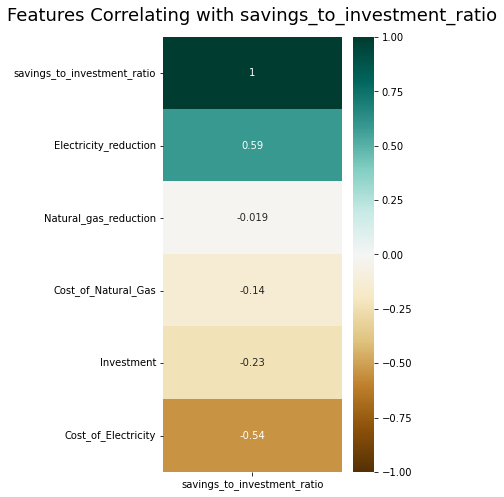

In [ ]:
plt.figure(figsize=(4, 8))
heatmap = sns.heatmap(df_stir.corr()[['savings_to_investment_ratio']].sort_values(by='savings_to_investment_ratio', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with savings_to_investment_ratio', fontdict={'fontsize':18}, pad=16)
#The output below shows presence of strong linear correlation between:
#the variables savings_to_investment_ratio and Electricity_reduction
#savings_to_investment_ratio and Cost_of_Electricity

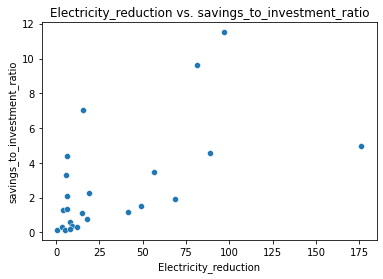

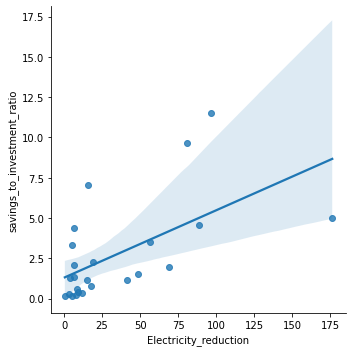

In [ ]:
#scatterplot to show the correlation between savings_to_investment_ratio and Electricity_reduction
ax = sns.scatterplot(x="Electricity_reduction", y="savings_to_investment_ratio", data=df_whole)
ax.set_title("Electricity_reduction vs. savings_to_investment_ratio")
ax.set_xlabel("Electricity_reduction")
sns.lmplot(x="Electricity_reduction", y="savings_to_investment_ratio", data=df_whole)

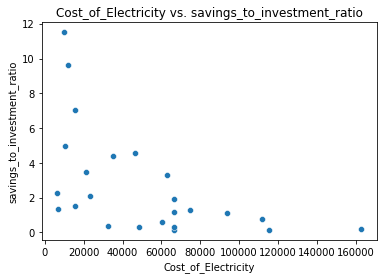

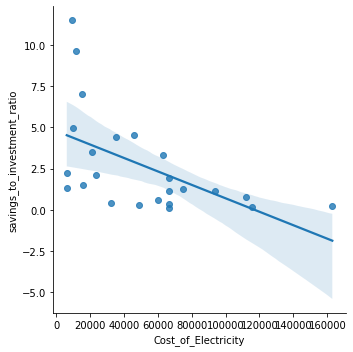

In [ ]:
#savings_to_investment_ratio and Cost_of_Electricity
ax = sns.scatterplot(x="Cost_of_Electricity", y="savings_to_investment_ratio", data=df_whole)
ax.set_title("Cost_of_Electricity vs. savings_to_investment_ratio")
ax.set_xlabel("Cost_of_Electricity")
sns.lmplot(x="Cost_of_Electricity", y="savings_to_investment_ratio", data=df_whole)

## Simple Payback Period

In [ ]:
#plot features correlation with simple payback period
df_simple_pb = pd.DataFrame().assign(Cost_of_Electricity=electricity_cost_cumulative['2022'], Cost_of_Natural_Gas = natural_gas_cost_cumulative['2022'],
                                 Investment = df_investment['2022'], Electricity_reduction = df_Electricity_reduction, 
                                 Natural_gas_reduction = df_Natural_gas_reduction, simple_payback = df_simple['2022'])

Text(0.5, 1.0, 'Features Correlating with simple_payback')

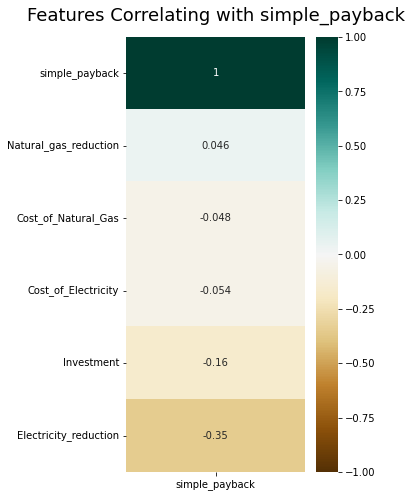

In [ ]:
plt.figure(figsize=(4, 8))
heatmap = sns.heatmap(df_simple_pb.corr()[['simple_payback']].sort_values(by='simple_payback', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with simple_payback', fontdict={'fontsize':18}, pad=16)
#The output below shows presence of strong linear correlation between:
#simple_payback and Investment
#simple_payback and Electricity_reduction

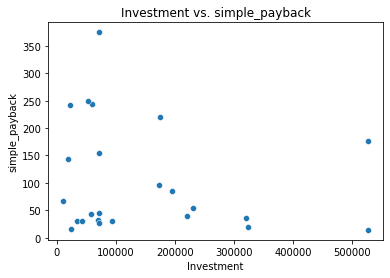

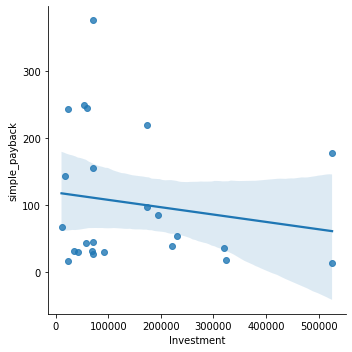

In [ ]:
#scatterplot to show the correlation between simple_payback and Investment
ax = sns.scatterplot(x="Investment", y="simple_payback", data=df_whole)
ax.set_title("Investment vs. simple_payback")
ax.set_xlabel("Investment")
sns.lmplot(x="Investment", y="simple_payback", data=df_whole)

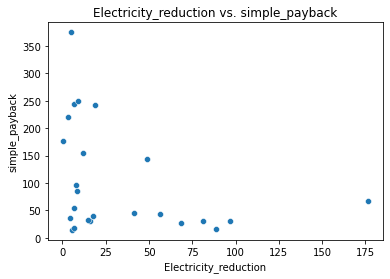

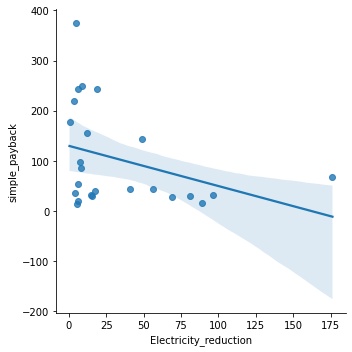

In [ ]:
#simple_payback and Electricity_reduction
ax = sns.scatterplot(x="Electricity_reduction", y="simple_payback", data=df_whole)
ax.set_title("Electricity_reduction vs. simple_payback")
ax.set_xlabel("Electricity_reduction")
sns.lmplot(x="Electricity_reduction", y="simple_payback", data=df_whole)

## Discounted Payback Period

In [ ]:
#plot features correlation with discounted simple payback period
df_d_simple_pb = pd.DataFrame().assign(Cost_of_Electricity=electricity_cost_cumulative['2022'], Cost_of_Natural_Gas = natural_gas_cost_cumulative['2022'],
                                 Investment = df_investment['2022'], Electricity_reduction = df_Electricity_reduction, 
                                 Natural_gas_reduction = df_Natural_gas_reduction, dissimple_payback=df_dissimple['2022'])

Text(0.5, 1.0, 'Features Correlating with discounted_simple_payback')

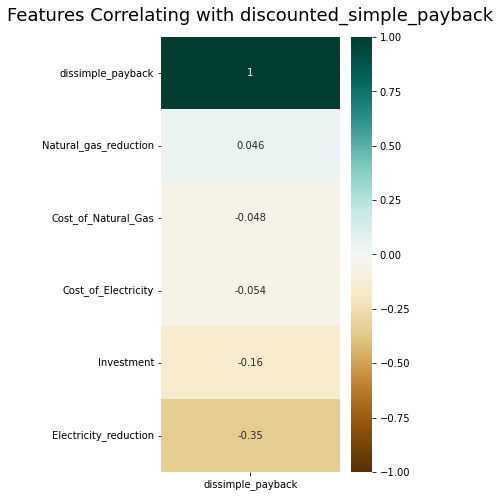

In [ ]:
plt.figure(figsize=(4, 8))
heatmap = sns.heatmap(df_d_simple_pb.corr()[['dissimple_payback']].sort_values(by='dissimple_payback', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with discounted_simple_payback', fontdict={'fontsize':18}, pad=16)
#The output below shows presence of strong linear correlation between:
#dissimple_payback and Investment
#dissimple_payback and Electricity_reduction

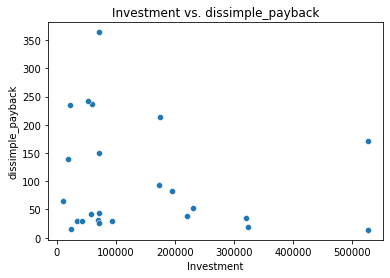

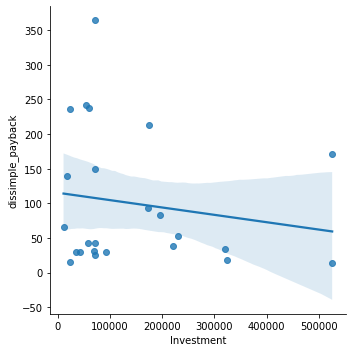

In [ ]:
#scatterplot to show the correlation between disscounted simple payback period and Investment
ax = sns.scatterplot(x="Investment", y="dissimple_payback", data=df_whole)
ax.set_title("Investment vs. dissimple_payback")
ax.set_xlabel("Investment")
sns.lmplot(x="Investment", y="dissimple_payback", data=df_whole)

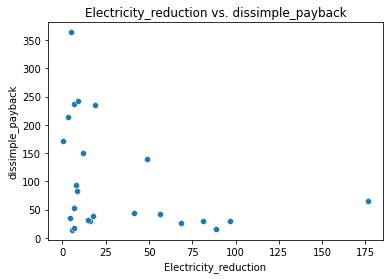

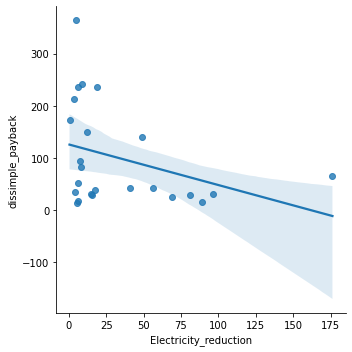

In [ ]:
#disscounted simple payback period and Electricity_reduction
ax = sns.scatterplot(x="Electricity_reduction", y="dissimple_payback", data=df_whole)
ax.set_title("Electricity_reduction vs. dissimple_payback")
ax.set_xlabel("Electricity_reduction")
sns.lmplot(x="Electricity_reduction", y="dissimple_payback", data=df_whole)

## Net Saving

In [ ]:
#plot features correlation with net savings
df_net_saving = pd.DataFrame().assign(Cost_of_Electricity=electricity_cost_cumulative['2022'], Cost_of_Natural_Gas = natural_gas_cost_cumulative['2022'],
                                 Investment = df_investment['2022'], Electricity_reduction = df_Electricity_reduction, 
                                 Natural_gas_reduction = df_Natural_gas_reduction, net_saving = df_ns['2022'])

Text(0.5, 1.0, 'Features Correlating with net_saving')

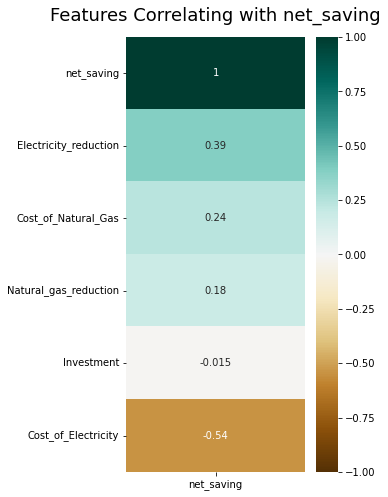

In [ ]:
plt.figure(figsize=(4, 8))
heatmap = sns.heatmap(df_net_saving.corr()[['net_saving']].sort_values(by='net_saving', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with net_saving', fontdict={'fontsize':18}, pad=16)
#The output below shows presence of strong linear correlation between:
#net_saving and Cost_of_Electricity 
#net_saving and Electricity_reduction

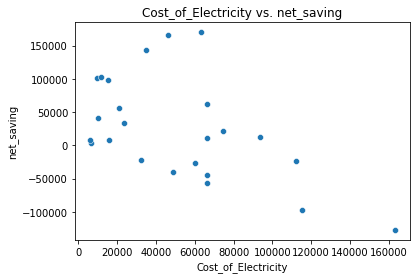

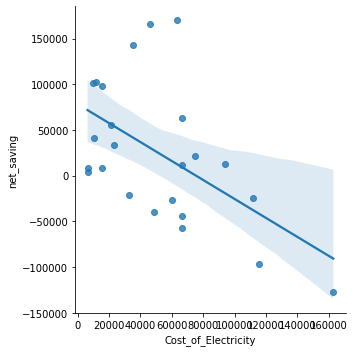

In [ ]:
#scatterplot to show the correlation between Cost_of_Electricity vs. net_saving
#the blue shadow is confidence interval
ax = sns.scatterplot(x="Cost_of_Electricity", y="net_saving", data=df_whole)
ax.set_title("Cost_of_Electricity vs. net_saving")
ax.set_xlabel("Cost_of_Electricity")
sns.lmplot(x="Cost_of_Electricity", y="net_saving", data=df_whole)

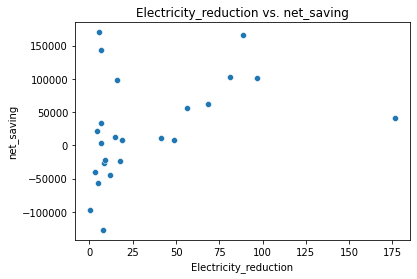

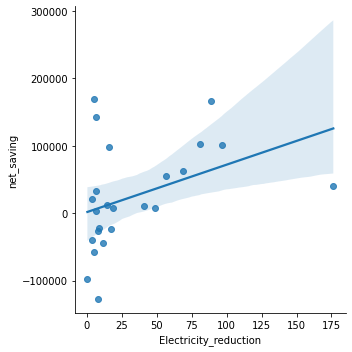

In [ ]:
#net_saving and Electricity_reduction
ax = sns.scatterplot(x="Electricity_reduction", y="net_saving", data=df_whole)
ax.set_title("Electricity_reduction vs. net_saving")
ax.set_xlabel("Electricity_reduction")
sns.lmplot(x="Electricity_reduction", y="net_saving", data=df_whole)

# Sensitivity Test Begins with Hexbin Plots

## Simple Payback Period

In [ ]:
# test continuous variable: x = electricity price, y = investment
# C = simple payback period
# For payback period, we usually only put the first year, which is 2022, into the function, and get the number of year to pay off the money of investment
# But we can also put future year into the function, but when the number of payback year becomes less than 1 in the future years (given that it was great than 1 in 2022),
# the payback period has another meaning that for this specific asset, the energy saving has covered the amount of investment in previous years

def simplePayBackPeriod(assetNum, year, lower, upper):
    n = 5000
    df_0 = pd.DataFrame({
        'electricity_price': np.random.uniform(electricity_price_30years[year-2021]*lower, electricity_price_30years[year-2021]*upper, size = n),
        'investment': np.random.uniform(investment_list[assetNum]*lower, investment_list[assetNum]*upper, size = n)
        })
    df_simple = []
    for i in range(0,n):
      spp = df_0['investment'][i]/(electricity_saving_cumulative[str(year-1)][assetNum] + df_0['electricity_price'][i] * electricity_decrease[assetNum] + natural_gas_saving_cumulative[str(year)][assetNum])
      df_simple.append(spp)
    df_0['df_simple'] = df_simple

    df_0.plot.hexbin(x='electricity_price',
                        y='investment',
                        C='df_simple',
                        gridsize=20,
                        figsize = (10,6),
                        cmap='RdYlGn_r', 
                        title = 'Simple Payback Period Sensitivity Analysis of Asset ' + str(assetNum) + " in " + str(year),
                        sharex=False)
 

In [ ]:
# test continuous variable: x = electricity reduction, y = investment
# C = simple payback period
# For payback period, we usually only put the first year, which is 2022, into the function, and get the number of year to pay off the money of investment
# But we can also put future year into the function, but when the number of payback year becomes less than 1 in the future years (given that it was great than 1 in 2022),
# the payback period has another meaning that for this specific asset, the energy saving has covered the amount of investment in previous years

def simplePayBackPeriod_2(assetNum, year, lower, upper):
    n = 5000
    df_0 = pd.DataFrame({
        'electricity_reduction': np.random.uniform(electricity_decrease[assetNum]*lower, electricity_decrease[assetNum]*upper, size = n),
        'investment': np.random.uniform(investment_list[assetNum]*lower, investment_list[assetNum]*upper, size = n)
        })
    df_simple = []
    for i in range(0,n):
      spp = df_0['investment'][i]/(electricity_saving_cumulative[str(year-1)][assetNum] + electricity_price_30years[year-2021] * df_0['electricity_reduction'][i] + natural_gas_saving_cumulative[str(year)][assetNum])
      df_simple.append(spp)
    df_0['df_simple'] = df_simple

    df_0.plot.hexbin(x='electricity_reduction',
                        y='investment',
                        C='df_simple',
                        gridsize=20,
                        figsize = (10,6),
                        cmap='RdYlGn_r', 
                        title = 'Simple Payback Period Sensitivity Analysis of Asset ' + str(assetNum) + " in " + str(year),
                        sharex=False)

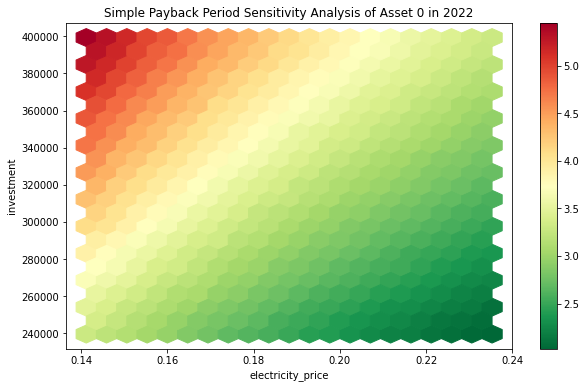

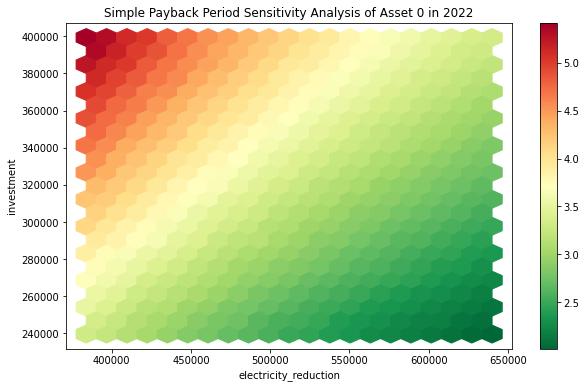

In [ ]:
simplePayBackPeriod(assetNum = 0, year = 2022, lower = 0.75, upper = 1.25)
simplePayBackPeriod_2(assetNum = 0, year = 2022, lower = 0.75, upper = 1.25)

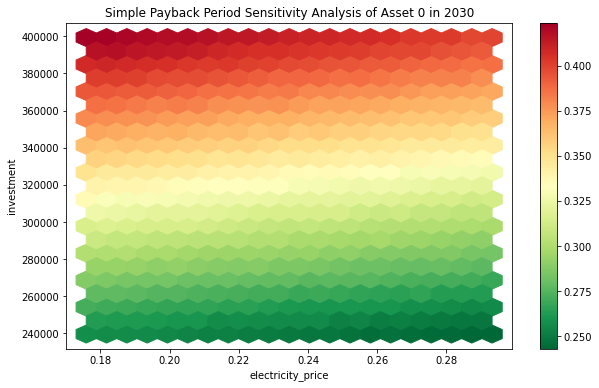

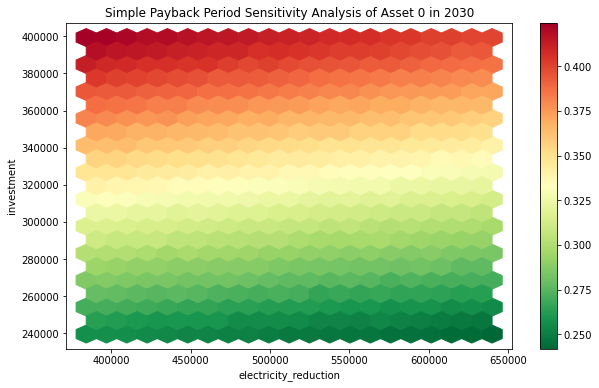

In [ ]:
simplePayBackPeriod(assetNum = 0, year = 2030, lower = 0.75, upper = 1.25)
simplePayBackPeriod_2(assetNum = 0, year = 2030, lower = 0.75, upper = 1.25)
# We usually only put the first year (2022) into the function to calculate payback period
# when the number on the legend becomes less than 1 in the future years(given that it is greater than 1 in 2022)
# it no longer means that it will take less than 1 year to payback, but for this asset it has reached the break-even point before the year input

## Discounted Payback Period

In [ ]:
# test continuous variable: x = electricity price, y = investment
# C = discounted payback period
# test continuous variable: x = electricity price, y = investment
# C = discounted payback period
def discountedPaybackPeriod(assetNum,year,lower,upper):
    n = 5000
    df_1 = pd.DataFrame({
        'electricity_price': np.random.uniform(electricity_price_30years[year-2021]*lower, electricity_price_30years[year-2021]*upper, size = n),
        'investment': np.random.uniform(investment_list[assetNum]*lower, investment_list[assetNum]*upper, size = n)
        })
    df_dissimple = []
    for i in range(0,n):
      discounted_pp = df_1['investment'][i]/((electricity_saving_cumulative[str(year-1)][assetNum] + df_1['electricity_price'][i] * electricity_decrease[assetNum] + natural_gas_saving_cumulative[str(year)][assetNum])*(1 + 0.03))
      df_dissimple.append(discounted_pp)
    df_1['df_dissimple'] = df_dissimple

    df_1.plot.hexbin(x='electricity_price',
                        y='investment',
                        C='df_dissimple',
                        gridsize=20,
                        figsize = (10,6),
                        cmap='RdYlGn_r', 
                        title='Discounted Payback Period Sensitivity Analysis of Asset '+ str(assetNum) + " in " + str(year),
                        sharex=False)

In [ ]:
# test continuous variable: x = electricity reduction, y = investment
# C = discounted payback period
def discountedPaybackPeriod_2(assetNum,year,lower,upper):
    n = 5000
    df_1 = pd.DataFrame({
        'electricity_reduction': np.random.uniform(electricity_decrease[assetNum]*lower, electricity_decrease[assetNum]*upper, size = n),
        'investment': np.random.uniform(investment_list[assetNum]*lower, investment_list[assetNum]*upper, size = n)
        })
    df_dissimple = []
    for i in range(0,n):
      discounted_pp = df_1['investment'][i]/((electricity_saving_cumulative[str(year-1)][assetNum] + electricity_price_30years[year-2021] * df_1['electricity_reduction'][i] + natural_gas_saving_cumulative[str(year)][assetNum])*(1 + 0.03))
      df_dissimple.append(discounted_pp)
    df_1['df_dissimple'] = df_dissimple

    df_1.plot.hexbin(x='electricity_reduction',
                        y='investment',
                        C='df_dissimple',
                        gridsize=20,
                        figsize = (10,6),
                        cmap='RdYlGn_r', 
                        title='Discounted Payback Period Sensitivity Analysis of Asset '+ str(assetNum) + " in " + str(year),
                        sharex=False)

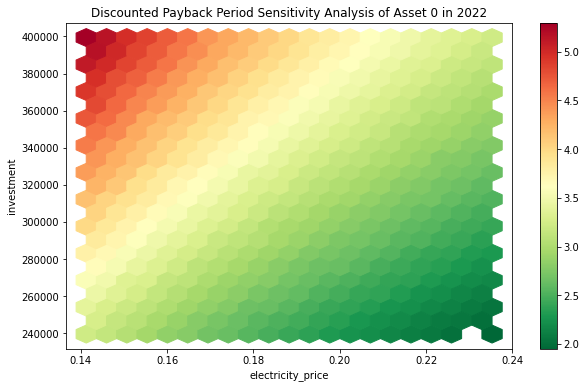

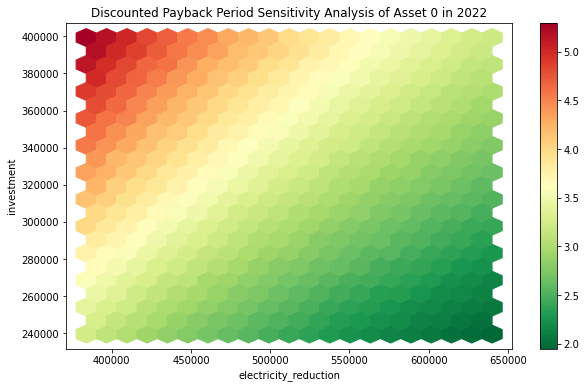

In [ ]:
discountedPaybackPeriod(assetNum = 0, year = 2022, lower = 0.75, upper = 1.25) 
discountedPaybackPeriod_2(assetNum = 0, year = 2022, lower = 0.75, upper = 1.25) 

## Net Saving

In [ ]:
# test continuous variable: x = electricity price, y = electricity decrease
# C = net saving
def netSaving(assetNum, year, lower, upper):
    n = 5000
    df_2 = pd.DataFrame({
        'electricity_price': np.random.uniform(electricity_price_30years[year-2021]*lower, electricity_price_30years[year-2021]*upper, size = n),
        'electricity_decrease': np.random.uniform(electricity_decrease[assetNum]*lower, electricity_decrease[assetNum]*upper, size = n)
        })
    net_saving = []
    for i in range(0,n):
      ns = natural_gas_saving_cumulative[str(year)][assetNum] + electricity_saving_cumulative[str(year-1)][assetNum] + df_2["electricity_price"][i] * df_2["electricity_decrease"][i] - (natural_gas_cost_cumulative[str(year)][assetNum] + electricity_cost_cumulative[str(year-1)][assetNum] + df_2["electricity_price"][i] * electricity_consumption_raw[assetNum])
      net_saving.append(ns)
    df_2['net_saving'] = net_saving

    df_2.plot.hexbin(x='electricity_price',
                        y='electricity_decrease',
                        C='net_saving',
                        gridsize=20,
                        figsize = (10,6),
                        cmap='RdYlGn_r', 
                        title='Net Saving Sensitivity Analysis of Asset '+ str(assetNum) + " in " + str(year),
                        sharex=False)

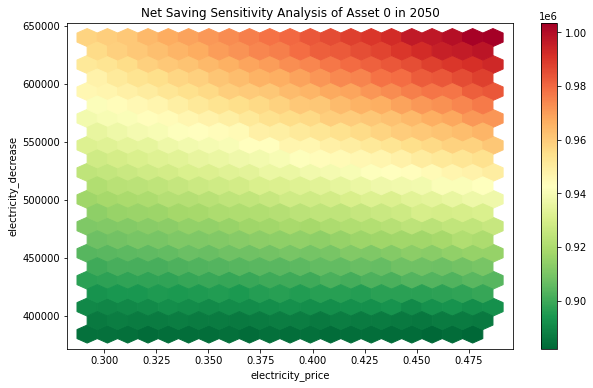

In [ ]:
netSaving(assetNum = 0, year = 2050, lower = 0.75, upper = 1.25)
# for net saving and saving-to-investment ratio, our mentor want us to input the ending year of the 30-year-period
# to see how this asset performs in the long-term duration

## Saving to Investment Ratio

In [ ]:
# test continuous variable: x = electricity price, y = electricity decrease
# C = saving to investment ratio
def savingToInvestmentRatio(assetNum, year, lower, upper):
    n = 5000
    df_3 = pd.DataFrame({
        'electricity_price': np.random.uniform(electricity_price_30years[year-2021]*lower, electricity_price_30years[year-2021]*upper, size = n),
        'electricity_decrease': np.random.uniform(electricity_decrease[assetNum]*lower, electricity_decrease[assetNum]*upper, size = n)
        })
    SIR = []
    for i in range(0,n):
      ratio = (natural_gas_saving_cumulative[str(year)][assetNum] + electricity_saving_cumulative[str(year-1)][assetNum] + df_3["electricity_price"][i] * df_3["electricity_decrease"][i]) / (natural_gas_cost_cumulative[str(year)][assetNum] + electricity_cost_cumulative[str(year-1)][assetNum] + df_3["electricity_price"][i] * electricity_consumption_raw[assetNum])
      SIR.append(ratio)
    df_3['saving_to_investment_ratio'] = SIR

    df_3.plot.hexbin(x='electricity_price',
                        y='electricity_decrease',
                        C='saving_to_investment_ratio',
                        gridsize=20,
                        cmap='RdYlGn_r', 
                        figsize = (10,6),
                        title='Saving to Investment Ratio  Sensitivity Analysis of Asset '+ str(assetNum) + " in " + str(year),
                        sharex=False)

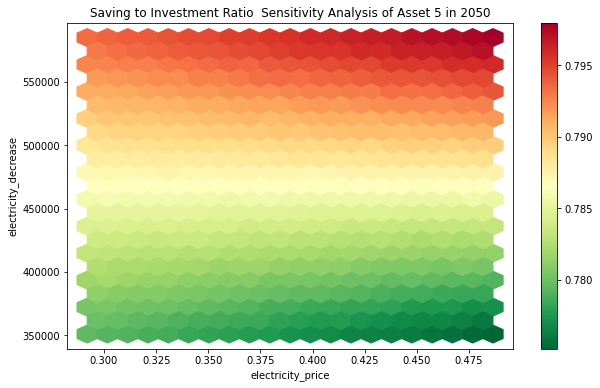

In [ ]:
savingToInvestmentRatio(assetNum = 5, year = 2050, lower = 0.75, upper = 1.25)
# for saving-to-investment ratio and net-saving, our mentor wants us to show the result of the end year, so we put 2050 here

## Example for Asset 0

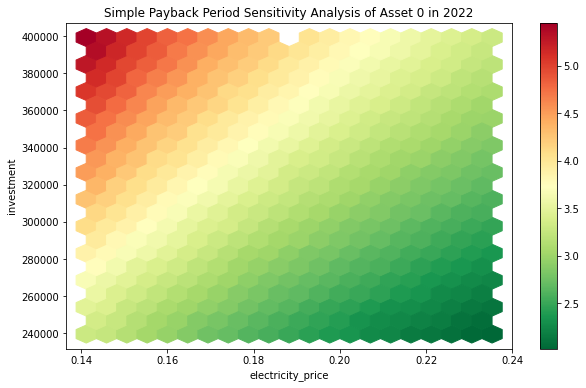

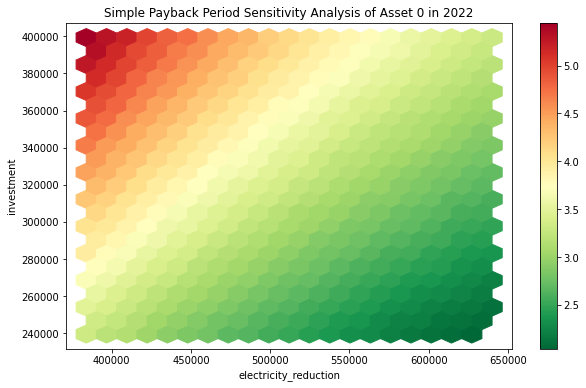

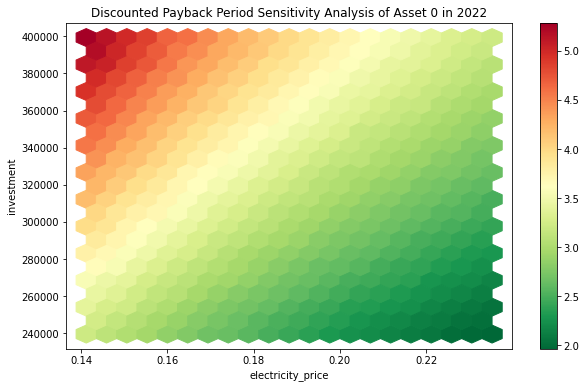

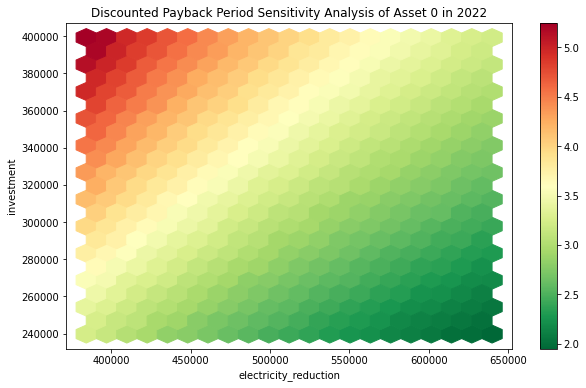

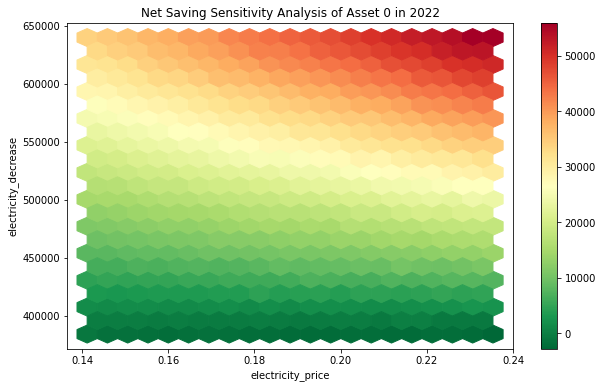

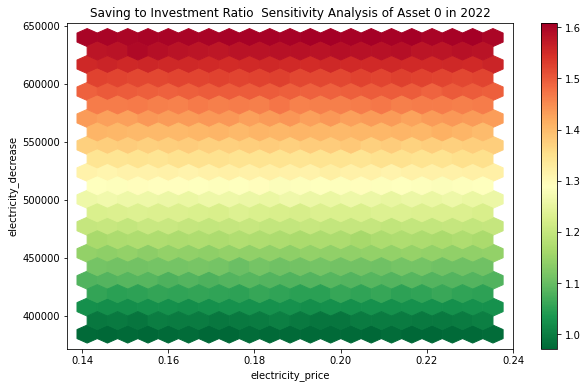

In [ ]:
# perform sensitivity test for asset 0 for an example
simplePayBackPeriod(0, 2022, 0.75, 1.25)
simplePayBackPeriod_2(0, 2022, 0.75, 1.25)
discountedPaybackPeriod(0, 2022, 0.75, 1.25)
discountedPaybackPeriod_2(0, 2022, 0.75, 1.25)
netSaving(0, 2022, 0.75, 1.25)
savingToInvestmentRatio(0, 2022, 0.75, 1.25)

# Portfolio Result

## Define functions to show portfolio result of Net Saving

In [ ]:
# create a dataframe with each asset and their respective net-saving values
def Net_Saving_Portfolio (year):
  df_portfolio_net_saving = pd.DataFrame()
  portfolio_net_saving  = []
  index_list = []
  for i in range(0,23):
    net_saving = df_final_saving_cumulative[str(year)][i] - df_final_cost_cumulative[str(year)][i]
    index_list.append(i)
    portfolio_net_saving.append(net_saving)
  df_portfolio_net_saving['Asset_number'] = index_list
  df_portfolio_net_saving['Net Saving'] = portfolio_net_saving
  return df_portfolio_net_saving

In [ ]:
# split assets into groups of with positive/negative net-saving value
def lists_net_saving(year):
    positive_net_saving = []
    negative_net_saving = []
    positive_asset = []
    negative_asset = []

    for i in range(0,23):
        if Net_Saving_Portfolio(year)['Net Saving'][i] >= 0:
            positive_net_saving.append(Net_Saving_Portfolio(year)['Net Saving'][i])
            positive_asset.append(i)
        else:
            negative_net_saving.append(-Net_Saving_Portfolio(year)['Net Saving'][i])
            negative_asset.append(i)
    return positive_net_saving, negative_net_saving, positive_asset, negative_asset

In [ ]:
def postive_negetive_proportion (year):
    df_net_saving_pn = pd.DataFrame(np.zeros((2,23))).rename(index = {0:'positive',1:'negative'})
    for i in range(0,len(lists_net_saving(year)[2])):
        df_net_saving_pn[lists_net_saving(year)[2][i]][0] = lists_net_saving(year = 2050)[0][i]
    for i in range(0,len(lists_net_saving(year)[3])):
        df_net_saving_pn[lists_net_saving(year)[3][i]][1] = lists_net_saving(year = 2050)[1][i]
    df_net_saving_pn.reset_index(inplace=True)
    df_net_saving_pn = df_net_saving_pn.rename(columns = {'index':'Positive/Negative'})
    df_net_saving_pn.plot(x = 'Positive/Negative', kind='bar', stacked=True,figsize = (10,6),
            title="Comparison of Positive and Negative Net Saving of Year " + str(year))
    plt.legend(loc='upper right',prop={'size': 8})

We obtain the comparison of positive and negative net saving of all 23 assets in the project as a whole in a long-term duration of 30 years. Although sensitivity is not shown in this part, the fluctuation won't affect whether the asset would have a positive or negative net saving and their proportion will remain nearly the same. 

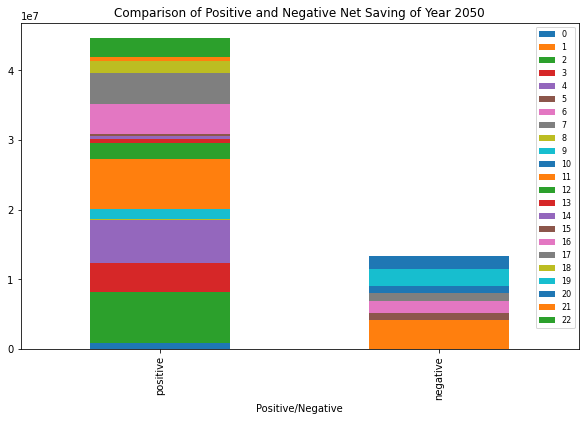

In [ ]:
postive_negetive_proportion (year = 2050)
#the positive net saving is a lot greater than the negative net saving in year 2050, 
#so if the client decides to invest on all the assets, we would have a positive net saving for the project as a whole

## Define function to show portfolio result of simple payback period

<ipython-input-70-9f95ff9a99b0>:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df_spp = pd.DataFrame(pd.np.empty((num_assets, 30)))


Text(0.5, 0.98, 'Simple Payback Period Assets Portfolio Analysis')

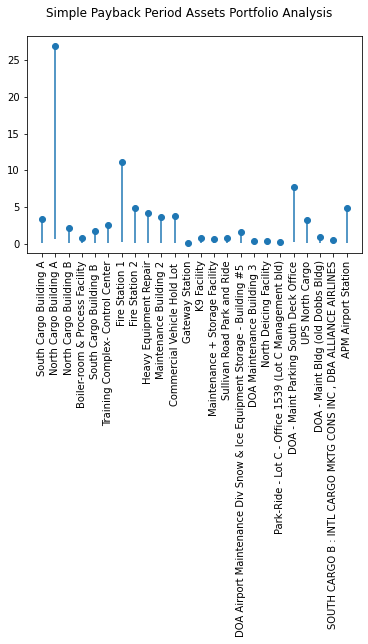

In [ ]:
#simple payback period
import matplotlib.pyplot as plt
num_assets = df['Asset Name'].count()
df_spp = pd.DataFrame(pd.np.empty((num_assets, 30)))
spp_column_names = ['Asset Name']
year_strings = [str(x) for x in range(2022, 2051)]
spp_column_names.extend(year_strings)
df_spp.columns = spp_column_names
df_spp['Asset Name'] = df['Asset Name']

#fill in dataframe
for assetNum in range(num_assets):
  inv_amount = investment_list[assetNum] #to the investment of the asset
  for i in range(0,29):
    elec_price = electricity_price_30years[i+1] #to the elec price of the year
    spp = inv_amount/(electricity_saving_cumulative[str(i+2021)][assetNum] + elec_price * electricity_decrease[assetNum] + natural_gas_saving_cumulative[str(i+2022)][assetNum])
    df_spp.at[assetNum,str(i+2022)]=spp
  
# making a simple plot
# x = range(num_assets)
x = df_spp['Asset Name']
y = [] #asset value at year 2022
for assetNum in range(num_assets):
  y.append(df_spp.at[assetNum,'2022'])

# creating error
y_errormin = []
y_errormax = []
for assetNum in range(num_assets):
  product_asset_values = df_spp.iloc[assetNum,1:]
  # y_errormin_at_row = product_asset_values.min()-y[assetNum]
  y_errormin_at_row = y[assetNum]-min(product_asset_values)
  y_errormin.append(y_errormin_at_row)
  # y_errormax_at_row = product_asset_values.max()-y[assetNum]
  y_errormax_at_row = max(product_asset_values)-y[assetNum]
  y_errormax.append(y_errormax_at_row)
  # if(assetNum == 0):
  #   print(product_asset_values)
  #   print(y[assetNum])
  #   print(y_errormin)
  #   print(y_errormax)
  
y_error = [y_errormin, y_errormax]
  
# ploting graph
# plt.plot(x, y)
plt.errorbar(x, y,
             yerr=y_error,
             fmt='o')  
# plt.errorbar(x, y,
#              fmt='o')  
# plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xticks(rotation=90)
plt.suptitle("Simple Payback Period Assets Portfolio Analysis")

In [ ]:
# test continuous variable: x = electricity price, y = investment
# C = simple payback period
# fixed number use data of 2022
for assetNum in range(num_assets):
  inv_amount = investment_list[assetNum] #to the investment of the asset
  for i in range(29):
    elec_price = electricity_price_30years[i] #to the elec price of the year
    spp = inv_amount/(electricity_saving_cumulative[str(i+2021)][assetNum] + elec_price * electricity_decrease[assetNum] + natural_gas_saving_cumulative[str(i+2022)][assetNum])

<ipython-input-71-f0f88fda7500>:8: RuntimeWarning: divide by zero encountered in double_scalars
  spp = inv_amount/(electricity_saving_cumulative[str(i+2021)][assetNum] + elec_price * electricity_decrease[assetNum] + natural_gas_saving_cumulative[str(i+2022)][assetNum])


# Decision support system

In [ ]:
from ipywidgets import interact, FloatSlider
from ipywidgets import widgets
from matplotlib.widgets import Slider, Button
import matplotlib.pyplot as plt
import panel as pn
#The interactive function in Python automatically creates user interface (UI) controls for exploring code and data interactively. 
#The interactive visual charts I created help to change the value of an input variable using the FloatSlider widget, which automatically generates a visual chart of the effect of that input variable on the output variable.

## Range of Widgets

In [ ]:
#Find the range of widget:
Cost_of_Electricity_max = df_whole['Cost_of_Electricity'].loc[df_whole['Cost_of_Electricity'].idxmax()]      # Maximum in column
Cost_of_Electricity_min = df_whole['Cost_of_Electricity'].loc[df_whole['Cost_of_Electricity'].idxmin()]      # Minimum in column
print(Cost_of_Electricity_min)
print(Cost_of_Electricity_max)

6278.367615
162977.9517249


In [ ]:
Cost_of_Natural_Gas_max = df_whole['Cost_of_Natural_Gas'].loc[df_whole['Cost_of_Natural_Gas'].idxmax()]      # Maximum in column
Cost_of_Natural_Gas_min = df_whole['Cost_of_Natural_Gas'].loc[df_whole['Cost_of_Natural_Gas'].idxmin()]      # Minimum in column
print(Cost_of_Natural_Gas_min)
print(Cost_of_Natural_Gas_max)

0.0
10166.159487704641


In [ ]:
Investment_max = df_whole['Investment'].loc[df_whole['Investment'].idxmax()]      # Maximum in column
Investment_min = df_whole['Investment'].loc[df_whole['Investment'].idxmin()]      # Minimum in column
print(Investment_min)
print(Investment_max)

10876
525809


In [ ]:
Electricity_reduction_max = df_whole['Electricity_reduction'].loc[df_whole['Electricity_reduction'].idxmax()]      # Maximum in column
Electricity_reduction_min = df_whole['Electricity_reduction'].loc[df_whole['Electricity_reduction'].idxmin()]      # Minimum in column
print(Electricity_reduction_min)
print(Electricity_reduction_max)

0.4959857008907597
176.29823019221595


In [ ]:
Natural_gas_reduction_max = df_whole['Natural_gas_reduction'].loc[df_whole['Natural_gas_reduction'].idxmax()]      # Maximum in column
Natural_gas_reduction_min = df_whole['Natural_gas_reduction'].loc[df_whole['Natural_gas_reduction'].idxmin()]      # Minimum in column
print(Natural_gas_reduction_min)
print(Natural_gas_reduction_max)

0.0
23.509229957805694


## Simple Payback Period

In [ ]:
from pandas.core.internals.blocks import F
def helper(Cost_of_Electricity = 143984.616605,
           Cost_of_Natural_Gas = 13.034225,
           Investment = 319494,
           Electricity_reduction = 4.077795,
           Natural_gas_reduction = 0.002168,
           ):
  
  df_helper = pd.DataFrame().assign(Cost_of_Electricity=electricity_cost_cumulative['2022'], Cost_of_Natural_Gas = natural_gas_cost_cumulative['2022'],
                                 Investment = df_investment['2022'], Electricity_reduction = df_Electricity_reduction,
                                 Natural_gas_reduction = df_Natural_gas_reduction, savings = df_final_saving_cumulative['2022'])
  
  ax = sns.scatterplot(x="Cost_of_Electricity", y="savings_to_investment_ratio", data=df_whole)
  ax.set_title("Cost_of_Electricity vs. savings_to_investment_ratio")
  ax.set_xlabel("Cost_of_Electricity")
  sns.lmplot(x="Cost_of_Electricity", y="savings_to_investment_ratio", data=df_whole)

In [ ]:
def generate_random(df,var,lower,upper): #var is string, lower and upper is number
  i=0
  inv_r1=np.array([])
  inve1 = df[var]
  while i < len(df):
    inve1[i]
    inv_r1=np.append( inv_r1,np.random.uniform(low=lower*inve1[i], high=upper*inve1[i]) )
    i = i+1
  return inv_r1
  #can change the fluctuation range of variable by changing value of upper and lower

In [ ]:
def simple_int(Electricity_reduction,
               Investment,
               lower,
               upper):
  
  df_1 = pd.DataFrame().assign(Cost_of_Electricity=electricity_cost_cumulative['2022'], Cost_of_Natural_Gas = natural_gas_cost_cumulative['2022'],
                                 Investment = df_investment['2022'], Electricity_reduction = df_Electricity_reduction,
                                 Natural_gas_reduction = df_Natural_gas_reduction, savings = df_final_saving_cumulative['2022'])    
  
  df_1["Investment_random"]=generate_random(df_1,'Investment',lower,upper)
  df_1["Electricity_reduction_random"] = generate_random(df_1,'Electricity_reduction',lower,upper)
  df_1["simple"] = df_1["Investment_random"]/df_1["savings"]
  
  df_1.plot.hexbin(x='Electricity_reduction_random',
                        y='Investment_random',
                        C='simple',
                        gridsize=20,
                        cmap='RdYlGn_r', 
                        title = 'Simple Payback Period Sensitivity Analysis',
                        sharex=False)

In [ ]:
interact(simple_int,
            Electricity_reduction = FloatSlider(min=0, max=180, value=50, continuous_update=False),
            Investment = FloatSlider(min=10876, max=525809, value=10876, continuous_update=False),
            lower = FloatSlider(min=0.75, max=1, value=1, continuous_update=False),
            upper = FloatSlider(min=1, max=1.25, value=1, continuous_update=False))
#Using FloatSlider widget, we can change the numeric floating-point values of most correlated 2 variables (investment and Electricity_reduction) within a set bounds 
#using a slider to detect how fluctuation of Investment will affect the simple payback period of different projects.

interactive(children=(FloatSlider(value=50.0, continuous_update=False, description='Electricity_reduction', ma…

<function __main__.simple_int(Electricity_reduction, Investment, lower, upper)>

## Dicounted Payback Period

In [ ]:
def dis_int(Electricity_reduction,
               Investment,
               lower,
               upper):
  
  df_4 = pd.DataFrame().assign(Cost_of_Electricity=electricity_cost_cumulative['2022'], Cost_of_Natural_Gas = natural_gas_cost_cumulative['2022'],
                                 Investment = df_investment['2022'], Electricity_reduction = df_Electricity_reduction,
                                 Natural_gas_reduction = df_Natural_gas_reduction, savings = df_final_saving_cumulative['2022'])    
  
  df_4["Investment_random"]=generate_random(df_4,'Investment',lower,upper)
  df_4["Electricity_reduction_random"] = generate_random(df_4,'Electricity_reduction',lower,upper)
  df_4["discounted"] = (1+0.03) * (df_4["Investment_random"]/df_4["savings"])
  df_4.plot.hexbin(x='Electricity_reduction_random',
                        y='Investment_random',
                        C='discounted',
                        gridsize=20,
                        cmap='RdYlGn_r', 
                        title = 'discounted Payback Period Sensitivity Analysis',
                        sharex=False)

In [ ]:
interact(dis_int,
            Electricity_reduction = FloatSlider(min=0, max=180, value=50, continuous_update=False),
            Investment = FloatSlider(min=10876, max=525809, value=10876, continuous_update=False),
            lower = FloatSlider(min=0.75, max=1, value=1, continuous_update=False),
            upper = FloatSlider(min=1, max=1.25, value=1, continuous_update=False))

interactive(children=(FloatSlider(value=50.0, continuous_update=False, description='Electricity_reduction', ma…

<function __main__.dis_int(Electricity_reduction, Investment, lower, upper)>

## Net Saving

In [ ]:
def Net_int(Cost_of_Electricity,
            Electricity_reduction,
            lower,
            upper):
  
  df_2 = pd.DataFrame().assign(Electricity_price = electricity_price_30years[0:23], Cost_of_Electricity=electricity_cost_cumulative['2022'], Cost_of_Natural_Gas = natural_gas_cost_cumulative['2022'],
                                 Investment = df_investment['2022'], Electricity_reduction = df_Electricity_reduction,
                                 Natural_gas_reduction = df_Natural_gas_reduction, Total_savings = df_final_saving_cumulative_corr['2022'],
                               Total_cost = df_final_cost_cumulative_corr['2022'])    
  
  df_2["Cost_of_Electricity_random"]=generate_random(df_2,'Cost_of_Electricity',lower,upper)
  df_2["Electricity_reduction_random"]=generate_random(df_2,'Electricity_reduction',lower,upper)
  df_2["Net_saving"] = df_2["Total_savings"] - df_2["Total_cost"]
  
  df_2.plot.hexbin(x='Cost_of_Electricity_random',
                        y='Electricity_reduction_random',
                        C='Net_saving',
                        gridsize=20,
                        cmap='RdYlGn_r', 
                        title = 'Net_saving Sensitivity Analysis',
                        sharex=False)

In [ ]:
interact(Net_int,
            Cost_of_Electricity = FloatSlider(min=6270, max=162978, value=143984, continuous_update=False),
            Electricity_reduction = FloatSlider(min=0, max=180, value=50, continuous_update=False),
            lower = FloatSlider(min=0.75, max=1, value=1, continuous_update=False),
            upper = FloatSlider(min=1, max=1.25, value=1, continuous_update=False))

interactive(children=(FloatSlider(value=143984.0, continuous_update=False, description='Cost_of_Electricity', …

<function __main__.Net_int(Cost_of_Electricity, Electricity_reduction, lower, upper)>

## Saving to Investment Ratio

In [ ]:
def Net_stir(Cost_of_Electricity,
            Electricity_reduction,
            lower,
            upper):
  
  df_3 = pd.DataFrame().assign(Electricity_price = electricity_price_30years[0:23], Cost_of_Electricity=electricity_cost_cumulative['2022'], Cost_of_Natural_Gas = natural_gas_cost_cumulative['2022'],
                                 Investment = df_investment['2022'], Electricity_reduction = df_Electricity_reduction,
                                 Natural_gas_reduction = df_Natural_gas_reduction, Total_savings = df_final_saving_cumulative_corr['2022'],
                                 Total_cost = df_final_cost_cumulative_corr['2022'])    
  
  df_3["Cost_of_Electricity_random"]=generate_random(df_3,'Cost_of_Electricity',lower,upper)
  df_3["Electricity_reduction_random"]=generate_random(df_3,'Electricity_reduction',lower,upper)
  df_3["Saving_to_investment_ratio"] = df_3["Total_savings"] / df_3["Total_cost"]
  
  df_3.plot.hexbin(x='Cost_of_Electricity_random',
                        y='Electricity_reduction_random',
                        C='Saving_to_investment_ratio',
                        gridsize=20,
                        cmap='RdYlGn_r', 
                        title = 'Saving_to_investment_ratio Sensitivity Analysis',
                        sharex=False)

In [ ]:
interact(Net_stir,
            Cost_of_Electricity = FloatSlider(min=6270, max=162978, value=143984, continuous_update=False),
            Electricity_reduction = FloatSlider(min=0, max=180, value=50, continuous_update=False),
            lower = FloatSlider(min=0.75, max=1, value=1, continuous_update=False),
            upper = FloatSlider(min=1, max=1.25, value=1, continuous_update=False))

interactive(children=(FloatSlider(value=143984.0, continuous_update=False, description='Cost_of_Electricity', …

<function __main__.Net_stir(Cost_of_Electricity, Electricity_reduction, lower, upper)>